##### Copyright 2018 The TensorFlow Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Get Started with TensorFlow

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To run the Colab notebook:

1. Connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

For more examples and guides (including details for this program), see [Get Started with TensorFlow](https://www.tensorflow.org/get_started/).

Let's get started, import the TensorFlow library into your program:

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import os

In [3]:
#https://www.tensorflow.org/tutorials/load_data/images

#images folder path
dirname = os.getcwd()
# curpath = os.path.join(dirname, 'dev_ws/dataset/crop-images')
alternate = os.path.join(dirname, 'dev_ws/dataset/dataset-ml')

In [4]:
#https://www.tensorflow.org/tutorials/keras/save_and_load
#https://www.pythonfixing.com/2022/01/fixed-batchdataset-get-img-array-and.html 

#specify image dimensions
img_height = 28
img_width = 28

#load in the dataset with train-test split
train_ds = tf.keras.utils.image_dataset_from_directory(alternate, validation_split=0.2, subset="training", seed=123,
  image_size=(img_height, img_width))
val_ds = tf.keras.utils.image_dataset_from_directory(alternate, validation_split=0.2, subset="validation", seed=123,
  image_size=(img_height, img_width))

train_ds_unbatch = train_ds.unbatch()
x_train = list(train_ds_unbatch.map(lambda x, y: x))
y_train = list(train_ds_unbatch.map(lambda x, y: y))

val_ds_unbatch = val_ds.unbatch()
x_test = list(val_ds_unbatch.map(lambda x, y: x))
y_test = list(val_ds_unbatch.map(lambda x, y: y))

Found 272 files belonging to 10 classes.
Using 218 files for training.
Found 272 files belonging to 10 classes.
Using 54 files for validation.


2022-04-25 11:29:14.780206: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Let's examine our dataset. Below code was taken from https://github.com/ageron/handson-ml/blob/master/03_classification.ipynb

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

In [6]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(512, activation=tf.nn.relu),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# ])

model = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(9)
])

AttributeError: module 'tensorflow' has no attribute 'layers'

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
7/7 [==============================] - 0s 8ms/step - loss: 0.0423 - accuracy: 0.9954 - val_loss: 76.2982 - val_accuracy: 0.7037
Epoch 2/10
7/7 [==============================] - 0s 6ms/step - loss: 1.0490 - accuracy: 0.9862 - val_loss: 82.7161 - val_accuracy: 0.6481
Epoch 3/10
7/7 [==============================] - 0s 6ms/step - loss: 1.0428 - accuracy: 0.9725 - val_loss: 63.6346 - val_accuracy: 0.7407
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 1.9257 - accuracy: 0.9771 - val_loss: 73.2732 - val_accuracy: 0.6667
Epoch 5/10
7/7 [==============================] - 0s 5ms/step - loss: 0.9621 - accuracy: 0.9862 - val_loss: 99.0491 - val_accuracy: 0.6481
Epoch 6/10
7/7 [==============================] - 0s 5ms/step - loss: 2.1700 - accuracy: 0.9679 - val_loss: 68.3762 - val_accuracy: 0.6667
Epoch 7/10
7/7 [==============================] - 0s 5ms/step - loss: 1.4056 - accuracy: 0.9725 - val_loss: 63.8435 - val_accuracy: 0.6852
Epoch 8/10
7/7 [===========

You’ve now trained an image classifier. See [Get Started with TensorFlow](https://www.tensorflow.org/get_started/) to learn more.

In [8]:
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

Import libraries to handle loading and displaying images

In [9]:
def make_prediction_and_display_image(np_image, tensorflow_model):
    image = np_image.reshape(1, 28, 28)

    print("Predicted Label: ", np.argmax(tensorflow_model.predict(image)[0]))
    print('Actual image: ')
    plt.figure(figsize = (1, 1))
    plt.imshow(Image.fromarray(image[0]), cmap = 'gray')

Test our model with one random image in our test set.

In [ ]:
print("Predicted Label: ", np.argmax(model.predict(x_test[42].numpy())))
print('Actual image: ')
plt.figure(figsize = (1, 1))
plt.imshow((x_test[42].numpy()), cmap = 'gray')

In [ ]:
number_three = np.array(np.array(Image.open('mnist_test/3.png')))
make_prediction_and_display_image(number_three, model)

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
Predicted Label:  6
Actual image: 


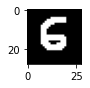

In [21]:
# number_nine = Image.open('mnist_test/dataset-ml/0/0-m-1.jpeg')
number_nine = image.load_img('mnist_test/6.png', target_size=(28, 28))
print(type(number_nine))
img_array = image.img_to_array(number_nine)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)
print(type(img_preprocessed))
print("Predicted Label: ", np.argmax(model.predict(img_preprocessed)))
print('Actual image: ')
plt.figure(figsize = (1, 1))
plt.imshow(number_nine, cmap = 'gray')


Predicted Label:  6
Actual image: 


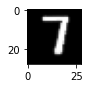

In [22]:
# number_nine = Image.open('mnist_test/dataset-ml/0/0-m-1.jpeg')
number_nine = image.load_img('mnist_test/dataset-ml/7/7-m-1.jpeg', target_size=(28, 28))
img_array = image.img_to_array(number_nine)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)
print("Predicted Label: ", np.argmax(model.predict(img_preprocessed)))
print('Actual image: ')
plt.figure(figsize = (1, 1))
plt.imshow(number_nine, cmap = 'gray')

Predicted Label:  6
Actual image: 


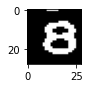

In [39]:
# number_nine = Image.open('mnist_test/dataset-ml/0/0-m-1.jpeg')
number_nine = image.load_img('mnist_test/47-8.jpeg', target_size=(28, 28))
img_array = image.img_to_array(number_nine)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)
print("Predicted Label: ", np.argmax(model.predict(img_preprocessed)))
print('Actual image: ')
plt.figure(figsize = (1, 1))
plt.imshow(number_nine, cmap = 'gray')

In [19]:
number_nine = np.array(np.array(Image.open('mnist_test/another_9.png')))
make_prediction_and_display_image(number_nine, model)

ValueError: in user code:

    File "/Users/duy/miniforge3/envs/TFmacOS/lib/python3.9/site-packages/keras/engine/training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "/Users/duy/miniforge3/envs/TFmacOS/lib/python3.9/site-packages/keras/engine/training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/duy/miniforge3/envs/TFmacOS/lib/python3.9/site-packages/keras/engine/training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/duy/miniforge3/envs/TFmacOS/lib/python3.9/site-packages/keras/engine/training.py", line 1572, in predict_step
        return self(x, training=False)
    File "/Users/duy/miniforge3/envs/TFmacOS/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/duy/miniforge3/envs/TFmacOS/lib/python3.9/site-packages/keras/engine/input_spec.py", line 247, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1of input shape to have value 2352, but received input with shape (None, 784)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 28, 28), dtype=uint8)
      • training=False
      • mask=None


In [17]:
number_nine = np.array(np.array(Image.open('mnist_test/ugly_9.png')))
make_prediction_and_display_image(number_nine, model)

ValueError: in user code:

    File "/Users/duy/miniforge3/envs/TFmacOS/lib/python3.9/site-packages/keras/engine/training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "/Users/duy/miniforge3/envs/TFmacOS/lib/python3.9/site-packages/keras/engine/training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/duy/miniforge3/envs/TFmacOS/lib/python3.9/site-packages/keras/engine/training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/duy/miniforge3/envs/TFmacOS/lib/python3.9/site-packages/keras/engine/training.py", line 1572, in predict_step
        return self(x, training=False)
    File "/Users/duy/miniforge3/envs/TFmacOS/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/duy/miniforge3/envs/TFmacOS/lib/python3.9/site-packages/keras/engine/input_spec.py", line 247, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1of input shape to have value 2352, but received input with shape (None, 784)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 28, 28), dtype=uint8)
      • training=False
      • mask=None


Predicted Label:  8
Actual image: 


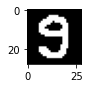

In [115]:
number_nine = np.array(np.array(Image.open('mnist_test/one_more_9.png')))
make_prediction_and_display_image(number_nine, model)

Predicted Label:  8
Actual image: 


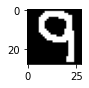

In [116]:
number_nine = np.array(np.array(Image.open('mnist_test/nine.png')))
make_prediction_and_display_image(number_nine, model)

Predicted Label:  8
Actual image: 


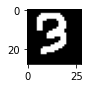

In [117]:
number_three = np.array(np.array(Image.open('mnist_test/3.png')))
make_prediction_and_display_image(number_three, model)

Predicted Label:  8
Actual image: 


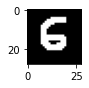

In [118]:
number_six=np.array(np.array(Image.open('mnist_test/6.png')))
make_prediction_and_display_image(number_six, model)

Predicted Label:  8
Actual image: 


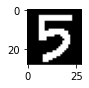

In [119]:
number_five = np.array(np.array(Image.open('mnist_test/number_five.png')))
make_prediction_and_display_image(number_five, model)

In [9]:
from tensorflow import keras

In [10]:
dirname = os.getcwd()
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.join(dirname, "training_1")

In [11]:
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)

In [12]:
os.listdir(checkpoint_dir)

['cp.ckpt.data-00000-of-00001', 'checkpoint', 'cp.ckpt.index']

In [13]:
# Save the entire model as a SavedModel.
model.save('dev_ws/saved_model/my_model')

2022-04-25 08:46:48.922028: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: dev_ws/saved_model/my_model/assets


In [14]:
new_model = tf.keras.models.load_model('dev_ws/saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2352)              0         
                                                                 
 dense (Dense)               (None, 512)               1204736   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,209,866
Trainable params: 1,209,866
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Evaluate the restored model
loss, acc = new_model.evaluate(val_ds, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(val_ds).shape)

340/340 - 3s - loss: 0.4280 - accuracy: 0.9275 - 3s/epoch - 8ms/step
Restored model, accuracy: 92.75%
(10864, 10)
